iteatros =  99 loss =  1593.1334591670343 theat0 =  0.0072735050553686485 theat1 =  0.3685351486795526
iteatros =  99 loss =  922.6427096878137 theat0 =  0.01274199579526775 theat1 =  0.6452340122674316
iteatros =  99 loss =  544.6789340270774 theat0 =  0.016855267941536783 theat1 =  0.8529814900056218
iteatros =  99 loss =  331.6161632500938 theat0 =  0.019951031565302785 theat1 =  1.0089597394280754
iteatros =  99 loss =  211.51008995888867 theat0 =  0.022282841973126334 theat1 =  1.1260692559400733
iteatros =  99 loss =  143.80483504690562 theat0 =  0.02404107043012985 theat1 =  1.2139958302447225
iteatros =  99 loss =  105.63855732624896 theat0 =  0.025368649139452446 theat1 =  1.2800116281462905
iteatros =  99 loss =  84.12375949653142 theat0 =  0.026372892693351885 theat1 =  1.329576647398786
iteatros =  99 loss =  71.99560294294272 theat0 =  0.02713437370918469 theat1 =  1.366790296112002
iteatros =  99 loss =  65.15880998130052 theat0 =  0.027713586724842695 theat1 =  1.3947304

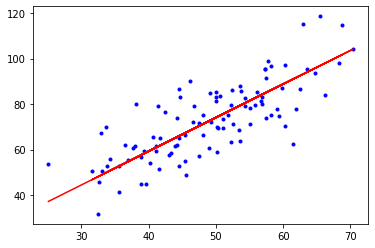

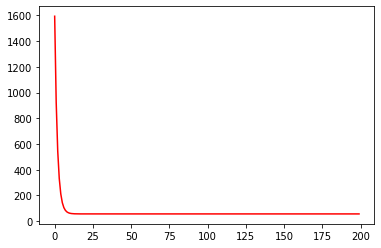

1259.9749904852804


In [15]:
#基于梯度下降的单变量线性回归算法
import numpy as np
from matplotlib import pyplot as plt

#导入数据
train_data=np.genfromtxt('data.csv',delimiter=',')

#影响房价的单变量因素为x，房价为y
x_data=train_data[:,0]
y_data=train_data[:,1]

Ir=0.0001 #学习率
theat0=0
theat1=0
iteators=200 #学习次数

#损失函数
def compute_loss(x_data,y_data,theat0,theat1):
    sum=0
    m=float(2*len(x_data))
    for i in range(len(x_data)):
        sum += (theat0+theat1*x_data[i]-y_data[i])**2
        
    return sum/m

#梯度下降
def gradient_fun(x_data,y_data,theat0,theat1,iteators,Ir):
    m=float(len(x_data))
    res=[] #存储损失值
    
    #循环学习
    for i in range(iteators):
        sum1=0
        sum2=0
        
        #每组循环结束后同步更新theat0和theat1
        for j in range(len(x_data)):
            sum1 += (theat0+theat1*x_data[j]-y_data[j])/m
            sum2 += ((theat0+theat1*x_data[j]-y_data[j])*x_data[j])/m
        
        theat0=theat0-Ir*sum1
        theat1=theat1-Ir*sum2
        
        #计算每次更新完成之后的损失值
        loss=compute_loss(x_data,y_data,theat0,theat1)
        res.append(loss)
        
        print("iteatros = " , j ,"loss = ",compute_loss(x_data,y_data,theat0,theat1),"theat0 = ",theat0,"theat1 = ",theat1)
    
    res=np.array(res)
    #print(res)
    return theat0,theat1,res

#画图
theat0,theat1,res=gradient_fun(x_data,y_data,theat0,theat1,iteators,Ir)

#画出原始数据散点图
plt.plot(x_data,y_data,'b.')
        
#画出计算后的预测直线
plt.plot(x_data,theat0+theat1*x_data,'r')

plt.show()

#画出损失的变化图
arr=np.arange(0,200,1)
plt.plot(arr,res,'r')

plt.show()

testx_data=852
print(theat0+theat1*testx_data)